## Assignment 1 Getting your Feet Wet with Coding for Data Analysis and Modeling


### The purpose of this assignment is to get started coding!  Its alright if you have struggles, if you ask your classmates or me.  
### I am available on the Discord Server in the Professors corner and of course by email and in class. 

###  Deadline: Wednesday 10/11 at midnight. 

### Problem #1 
#### Make an array x containing 200 random numbers (samples) drawn from a normal distribution with a mean of 0.25 and a standard deviation of and plot a histogram. Don't forget to set the random number seed.  



In [5]:
import numpy as np
from numpy import random 
myseed = 1234
rng = np.random.default_rng(seed = myseed)
x = rng.normal(.25, 1, 200)



### Problem #2  
#### Find the mean, median, 25%, 75% and standard deviation of the array you created in Problem 1

In [4]:
xmean = np.mean(x)
print('xmean = ' ,xmean)
xmedian = np.median(x)
print('xmedian = ' ,xmedian)
x_25 = np.percentile(x,25)*100
print('x_25 = ' ,x_25)
x_75 = np.percentile(x,75)*100
print('x_75 = ' ,x_75)
xstd = np.std(x)
print('xstd = ' ,xstd)


xmean =  0.3493512337340174
xmedian =  0.3784974142627954
x_25 =  -34.28570360706031
x_75 =  108.45990376814451
xstd =  1.0781809145649481


### Problem #3 
#### Compute the cumulative sum of the array x (there is a numpy function that does htis) and store it in a variable w.  Make a plot of the number of samples versus w. 

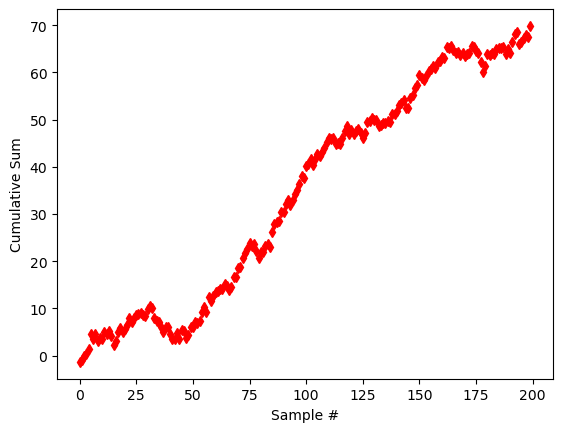

In [13]:
w = np.cumsum(x)
from matplotlib import pyplot as plt
plt.plot(w, 'rd', ms=5);
plt.xlabel('Sample #')
plt.ylabel('Cumulative Sum')
plt.show()

### Problem #4 
#### Find the sample number where w first exceeds 10. Save this to a variable called rt.  NOTE: There exceeds a remote possibility that you never cross 10 in 200 samples.  If this happens increase the number of samples from 200 to 300.  

array([-0.96949878,  2.95158409, -0.60939502, -0.04862044,  0.48259628,
       -0.30896666,  0.57613641, -0.77997943,  1.20511728,  1.25469471,
        0.45003028, -0.31649934,  0.65430777, -0.12976799,  0.33176739,
       -1.44769036,  0.22582415, -0.95319568,  0.83279315,  1.07120402,
        0.80127268,  1.63567595, -0.41637967,  2.63490566,  0.12018199,
        3.12163077, -0.27501473, -1.20799878,  1.14766798,  0.38985472,
       -0.30718799,  1.53939109,  1.11410841,  1.19546957, -0.51551448,
        0.84612336,  0.78187603, -0.55975106,  0.90004257, -0.42245433,
        1.13682143, -1.13519511,  1.17765158, -0.21035803, -0.6623814 ,
        1.46938688,  1.66623867, -0.31234331, -0.64818458,  1.16023446,
       -1.14002799, -0.09352634,  0.330849  , -1.51349162, -1.64061596,
        0.48226486,  0.57867027,  1.45923561,  0.98474819,  1.52897862,
        0.63071676, -1.61166331,  1.51322395, -0.49440805,  0.19963006,
        1.08692926,  0.30427546,  1.65474037,  2.03502221,  0.37

## The datafile ReactionTimeData.csv is for use in Problem 5 and 6.  You can load it into python using pandas. This is data from a perceptual discrimination Reaction Time + EEG experiment with 3 condition labeled 'Easy', 'Medium', 'Hard'.  The variable Correct indicates 1 if the subject got it right and 0 if the subject got it wrong.  Reaction Time is in units of milliseconds

### Problem 5 
#### Choose a subject (make a parameter which is the subject number than can be easily changed to run your code again on a different subject) Label the graphs with the subject number. 
#### a. make a histogram of the RT for an individual subject, showing all 3 difficulty conditions in a single graph.
#### b. Make an bar plot with an error that shows the reaction time means for each condition  and for correct and incorrect trials. The errorbar should show the standard deviation.  

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

rtdata = pd.read_excel('rtdata.xlsx')
### Before we get started, lets copy the values from the DataFrame to variables 
### I always go ahead and convert them into numpy arrays  
trialnumber = np.array(rtdata['trialnumber']) # this tells you the order of trials.  i wont use it in this tutorial 
condition = np.array(rtdata['condition']) #this is the experimental condition (difficulty, coded as easy = 1, middle = 2, hard = 3) 
condition_labels = ['Easy','Middle','Hard']
responsetime = np.array(rtdata['responsetime']) #this is the actual response time data in seconds. 
d = pd.read_csv('ReactionTimeData.csv')
subject = d['Subject']
rt = d['ReactionTime']
S1 = (subject ==1)
rt[subject ==1]
np.mean(rt[subject ==1])

Condition = np.array(d['Condition'])
rt1 = np.mean(rt[Condition == 'Easy'])
rt2 = np.mean(rt[Condition == 'Medium'])
rt3 = np.mean(rt[Condition == 'Hard'])
rt = [rt1,rt2,rt3]
print(rt)

0       756
1       756
2       757
3       758
4       759
       ... 
199    1708
200    1788
201    1800
202    1997
203    2018
Name: ReactionTime, Length: 204, dtype: int64

### Problem 6 
#### a. Calculate the mean reaction time for each subject in each condition.  
#### b. Make a histogram that shows the distribution of mean RT across subjects,showing all 3 conditions in a single graph.  
#### c.  Repeat (b) for the 25%, 50%, and 75%. Do the graphs show the same differences between conditions? 
#### d. Calculate the accuracy for each subject in each condition (accuracy is the proportion they get correct).  Visualize the accuracy in each condition for all the subjects in 1 graph.  
#### d.  What is your qualitiative opinion on the differences in reaction time and accuracy between conditions and subjects.   